In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [6]:
from utils import plot_wigner, plot_qfunc

### Constants

In [7]:
N = 3
r = 20 # k1/k2
k1 = 1

### Coherent States

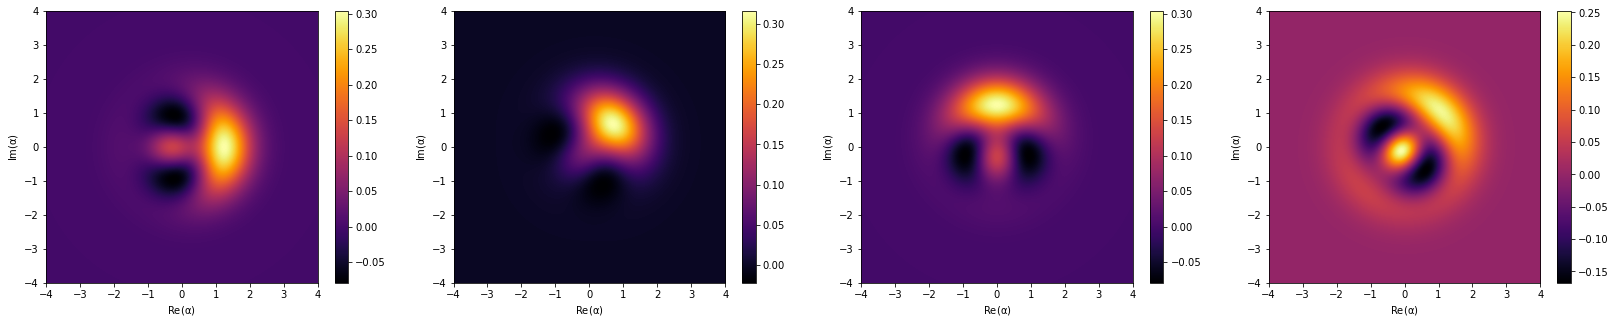

In [8]:
alphas = [1, 0.5+0.5j, 1j, 1+1j]
x = np.linspace(-4, 4, 1_000)
y = np.linspace(-4, 4, 1_000)

fig, axs = plt.subplots(1, len(alphas), figsize=[7*len(alphas), 5])
for alpha, ax in zip(alphas, axs):
    plot_wigner(coherent(N, alpha), x, y, ax=ax, fig=fig, cmap='inferno')

### QHO Operators

In [9]:
a = create(N)
adag = destroy(N)

### Operators for Dynamics
Natural units so set $\hbar = 1$

In [10]:
gain = k1 * lindblad_dissipator(adag)
loss = r/k1 * lindblad_dissipator(a**2)

## Steady State
For time-independent open quantum systems with decay rates larger than the corresponding excitation rates, the system will tend toward a steady state

### Interaction picture $\hat H=0$ with no signal

In [11]:
H0 = Qobj(np.zeros([N, N]))
sstate = steadystate(H0, [gain, loss])
sstate

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.01639344 0.         0.        ]
 [0.         0.6557377  0.        ]
 [0.         0.         0.32786885]]

(array([[1.02846012e-06, 1.41561510e-06, 1.93427783e-06, ...,
         1.93427783e-06, 1.41561510e-06, 1.02846012e-06],
        [1.41561510e-06, 1.94688140e-06, 2.65792215e-06, ...,
         2.65792215e-06, 1.94688140e-06, 1.41561510e-06],
        [1.93427783e-06, 2.65792215e-06, 3.62548526e-06, ...,
         3.62548526e-06, 2.65792215e-06, 1.93427783e-06],
        ...,
        [1.93427783e-06, 2.65792215e-06, 3.62548526e-06, ...,
         3.62548526e-06, 2.65792215e-06, 1.93427783e-06],
        [1.41561510e-06, 1.94688140e-06, 2.65792215e-06, ...,
         2.65792215e-06, 1.94688140e-06, 1.41561510e-06],
        [1.02846012e-06, 1.41561510e-06, 1.93427783e-06, ...,
         1.93427783e-06, 1.41561510e-06, 1.02846012e-06]]),
 (<AxesSubplot:xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>,
  <matplotlib.image.AxesImage at 0x197dfeb2cd0>))

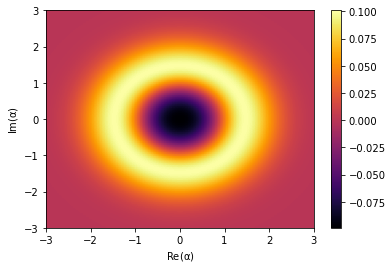

In [12]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
plot_wigner(sstate, x, y, cmap='inferno')

In [13]:
detuning = 0
drive_strength = k1
H_drive = detuning * adag*a + 0.5*drive_strength * (a + adag)

drive_sstate = steadystate(H_drive, [gain, loss])
drive_sstate

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.01529217+0.j         0.        -0.00703943j 0.00273606+0.j        ]
 [0.        +0.00703943j 0.60464721+0.j         0.        +0.10495912j]
 [0.00273606+0.j         0.        -0.10495912j 0.38006062+0.j        ]]

(array([[3.30627000e-12, 6.02753333e-12, 1.08463496e-11, ...,
         1.08463496e-11, 6.02753333e-12, 3.30627000e-12],
        [6.01974755e-12, 1.09653766e-11, 1.97153519e-11, ...,
         1.97153519e-11, 1.09653766e-11, 6.01974755e-12],
        [1.08178092e-11, 1.96888769e-11, 3.53696563e-11, ...,
         3.53696563e-11, 1.96888769e-11, 1.08178092e-11],
        ...,
        [9.44881411e-12, 1.71487374e-11, 3.07177587e-11, ...,
         3.07177587e-11, 1.71487374e-11, 9.44881411e-12],
        [5.25718184e-12, 9.54980856e-12, 1.71217358e-11, ...,
         1.71217358e-11, 9.54980856e-12, 5.25718184e-12],
        [2.88719318e-12, 5.24924462e-12, 9.41971261e-12, ...,
         9.41971261e-12, 5.24924462e-12, 2.88719318e-12]]),
 (<AxesSubplot:xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>,
  <matplotlib.image.AxesImage at 0x197e35d25e0>))

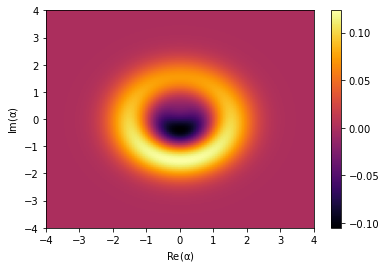

In [14]:
x = np.linspace(-4,4,100)
y = np.linspace(-4,4,100)
plot_wigner(drive_sstate, x, y, cmap='inferno')